In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')
data_df.head()

,training_set,y,dy,x
0,False,-3.751854,0.444200,AAAGCAAAA
1,True,-2.697741,0.369972,AAAGCAAAC
2,True,-2.242947,0.575121,AAAGCAAAG
3,False,-3.067251,0.357014,AAAGCAAAT
4,False,-2.987074,0.472637,AAAGCAACA


In [3]:
# Split into trianing and test data
ix = data_df['training_set']
L = len(data_df['x'][0])
train_df = data_df[ix]
print(f'training N: {len(train_df):,}')
test_df = data_df[~ix]
print(f'testing N: {len(test_df):,}')

training N: 17,498
testing N: 4,431


In [4]:
model_kwargs = {
    'regression_type':'GE',
    'L':L,
    'alphabet':'dna',
    'ge_nonlinearity_type':'nonlinear',
    'gpmap_type':'mlp',
    'gpmap_kwargs':{
        'features': 'pairwise',
        'hidden_layer_sizes': []
    },
    'ge_noise_model_type':'SkewedT',
    'ge_heteroskedasticity_order':2
}

fit_kwargs={'learning_rate':.005,
            'epochs':1000,
            'batch_size': 200,
            'early_stopping': True,
            'early_stopping_patience': 100,
            'linear_initialization': False}

file_name = 'mpsa_ge_blackbox'

In [5]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(**model_kwargs)

In [6]:
all([])

True

In [7]:
len(model.layer_gpmap.layers)

1

In [8]:
from tensorflow.keras.layers import Dense

# If you want to customize the G-P map
if False:
    
    # Set hyperparameters
    hidden_layer_sizes = (10,8,6,4,2)
    activation = 'relu'

     # Get input shape
    input_shape = model.layer_gpmap.x_shape
    
    # Initialize array to hold layers
    layers = []
    
    # Add hidden layer #1
    layers.append(
        Dense(units=hidden_layer_sizes[0],
              activation=activation,
              input_shape=input_shape)
    )

    # Add rest of hidden layers
    for size in hidden_layer_sizes[1:]:
        layers.append(
            Dense(units=size,
                  activation=activation)
        )

    # Add output layer. Last layer must have only 1 unit.
    layers.append(
        Dense(units=1, activation='linear')
    )
    
    # Set model layers
    model.layer_gpmap.layers = layers
    
    print('Using custom layers.')
else:
    print('Using built-in layers.')

Using built-in layers.


In [9]:
# Set training data
model.set_data(x=train_df['x'],
               y=train_df['y'])

# Fit model to data
model.fit(**fit_kwargs)

# Save model
model.save(file_name)

N = 17,498 observations set as training data.
Data shuffled.
Time to set data: 0.392 sec.
Epoch 1/1000
280/280 [==============================] - 1s 4ms/step - loss: 51.7868 - I_var: -0.1740 - val_loss: 42.9183 - val_I_var: 0.0621
Epoch 2/1000
280/280 [==============================] - 1s 3ms/step - loss: 40.1306 - I_var: 0.1472 - val_loss: 41.5489 - val_I_var: 0.1089
Epoch 3/1000
280/280 [==============================] - 1s 3ms/step - loss: 39.5106 - I_var: 0.1681 - val_loss: 41.2514 - val_I_var: 0.1177
Epoch 4/1000
280/280 [==============================] - 1s 3ms/step - loss: 39.1249 - I_var: 0.1799 - val_loss: 41.1896 - val_I_var: 0.1205
Epoch 5/1000
280/280 [==============================] - 1s 3ms/step - loss: 38.9256 - I_var: 0.1856 - val_loss: 41.3454 - val_I_var: 0.1157
Epoch 6/1000
280/280 [==============================] - 1s 3ms/step - loss: 38.7721 - I_var: 0.1900 - val_loss: 40.7032 - val_I_var: 0.1340
Epoch 7/1000
280/280 [==============================] - 1s 3ms/step -

Epoch 58/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.3664 - I_var: 0.3108 - val_loss: 37.4940 - val_I_var: 0.2500
Epoch 59/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0274 - I_var: 0.3209 - val_loss: 37.0094 - val_I_var: 0.2638
Epoch 60/1000
280/280 [==============================] - 1s 4ms/step - loss: 35.1752 - I_var: 0.3166 - val_loss: 37.1459 - val_I_var: 0.2593
Epoch 61/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.1727 - I_var: 0.3165 - val_loss: 36.8832 - val_I_var: 0.2670
Epoch 62/1000
280/280 [==============================] - 1s 4ms/step - loss: 35.2162 - I_var: 0.3152 - val_loss: 37.0674 - val_I_var: 0.2622
Epoch 63/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.1051 - I_var: 0.3184 - val_loss: 37.1040 - val_I_var: 0.2603
Epoch 64/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.1588 - I_var: 0.3169 - val_loss: 38.2484 - val_I_var: 0.2270
Epoch 65/1000

280/280 [==============================] - 1s 3ms/step - loss: 35.2227 - I_var: 0.3156 - val_loss: 37.4034 - val_I_var: 0.2529
Epoch 116/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.3192 - I_var: 0.3128 - val_loss: 37.2027 - val_I_var: 0.2584
Epoch 117/1000
280/280 [==============================] - 1s 3ms/step - loss: 34.9731 - I_var: 0.3222 - val_loss: 37.1281 - val_I_var: 0.2594
Epoch 118/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0791 - I_var: 0.3194 - val_loss: 37.7677 - val_I_var: 0.2416
Epoch 119/1000
280/280 [==============================] - 1s 2ms/step - loss: 35.0763 - I_var: 0.3198 - val_loss: 37.8350 - val_I_var: 0.2398
Epoch 120/1000
280/280 [==============================] - 1s 2ms/step - loss: 35.0628 - I_var: 0.3204 - val_loss: 37.1670 - val_I_var: 0.2593
Epoch 121/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0948 - I_var: 0.3186 - val_loss: 38.2304 - val_I_var: 0.2278
Epoch 122/1000
280/28

Epoch 172/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0773 - I_var: 0.3184 - val_loss: 37.9263 - val_I_var: 0.2361
Epoch 173/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.2077 - I_var: 0.3155 - val_loss: 36.9769 - val_I_var: 0.2653
Epoch 174/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.1358 - I_var: 0.3183 - val_loss: 37.2454 - val_I_var: 0.2574
Epoch 175/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0645 - I_var: 0.3203 - val_loss: 37.5401 - val_I_var: 0.2486
Epoch 176/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.3121 - I_var: 0.3127 - val_loss: 37.0550 - val_I_var: 0.2625
Epoch 177/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.1776 - I_var: 0.3164 - val_loss: 37.2872 - val_I_var: 0.2553
Epoch 178/1000
280/280 [==============================] - 1s 3ms/step - loss: 35.0072 - I_var: 0.3216 - val_loss: 37.1824 - val_I_var: 0.2589
Epoch 

In [10]:
len(model.layer_gpmap.layers)

1

In [11]:
# Load model
model = mavenn.load(file_name)

Model loaded from these files:
	mpsa_ge_blackbox.pickle
	mpsa_ge_blackbox.h5


In [12]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values
dy_test = test_df['dy'].values

On test data:
I_var_test: 0.295 +- 0.029 bits
I_pred_test: 0.354 +- 0.017 bits
I_intrinsic: 0.785 +- 0.024 bits
percent info explained: 45.1% +- 2.6%


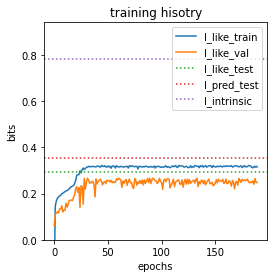

In [13]:
# Show training history
print('On test data:')

# Compute likelihood information
I_var, dI_var =  model.I_varlihood(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

# Compute intrinsic information
I_intr, dI_intr = mavenn.I_intrinsic(y_values=y_test, dy_values=dy_test)
print(f'I_intrinsic: {I_intr:.3f} +- {dI_intr:.3f} bits')

# Compute percent info explained
pct = 100*I_pred/I_intr
dpct = 100*np.sqrt((dI_pred/I_intr)**2 + (dI_intr*I_pred/I_intr**2)**2)
print(f'percent info explained: {pct:.1f}% +- {dpct:.1f}%')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.axhline(I_intr, color='C4', linestyle=':', label='I_intrinsic')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_intr*1.2]);

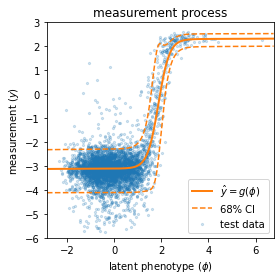

In [14]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.set_ylim([-6, 3])
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

In [15]:
# Plot pairwise parameters
if model.gpmap_type in ['pairwise', 'neighbor']:
    theta = model.get_theta()
    fig, ax = plt.subplots(1, 1, figsize=[8, 4])
    mavenn.heatmap_pairwise(values=theta['theta_lclc'],
                            alphabet=theta['alphabet'],
                            ax=ax);